
# **Escala, redimensionamento, interpolações e recorte.**

Tópicos:
1. Como redimensionar e dimensionar imagens
2. Recorte

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def imshow(image = None, size = 10):
    h, w = image.shape[0], image.shape[1]
    aspect_ratio = h/w
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

#### **Redimensionamento**

O redimensionamento é uma função simples que executamos usando a função cv2.resize. Seus argumentos são:

```cv2.resize(imagem, dsize (tamanho da imagem de saída), escala x, escala y, interpolação)```
- Se dsize for None, a imagem de saída é calculada como uma função de escalonamento usando a escala x e y.

- **INTER_NEAREST** - interpolação do vizinho mais próximo
- **INTER_LINEAR** - interpolação bilinear (usada por padrão)
- **INTER_AREA** - Redimensiona usando a relação de área de pixel. Pode ser um método preferido para decimação de imagem. Mas quando a imagem é ampliada, é semelhante ao método INTER_NEAREST.
- **INTER_CUBIC** - interpolação bicúbica em uma vizinhança de 4x4 pixels
- **INTER_LANCZOS4** - interpolação Lanczos em uma vizinhança de 8x8 pixels

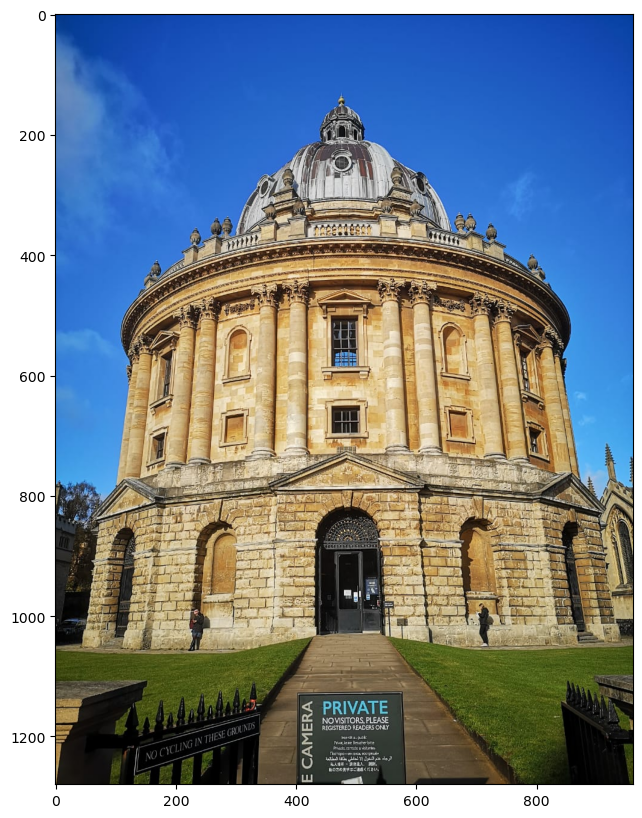

In [2]:
# Imagem de teste
image = cv2.imread('images/oxfordlibrary.jpeg')
imshow(image)

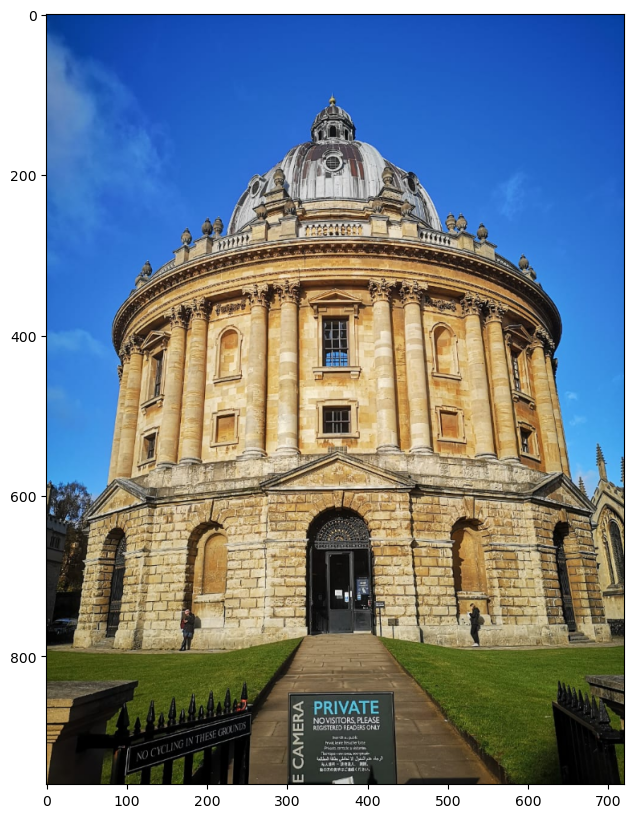

(1280, 960, 3)


In [7]:

# Se nenhuma interpolação for especificada, o cv.INTER_LINEAR é usado como padrão.
# Vamos fazer nossa imagem ter 3/4 do seu tamanho original.
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
imshow(image_scaled)

print(image.shape)

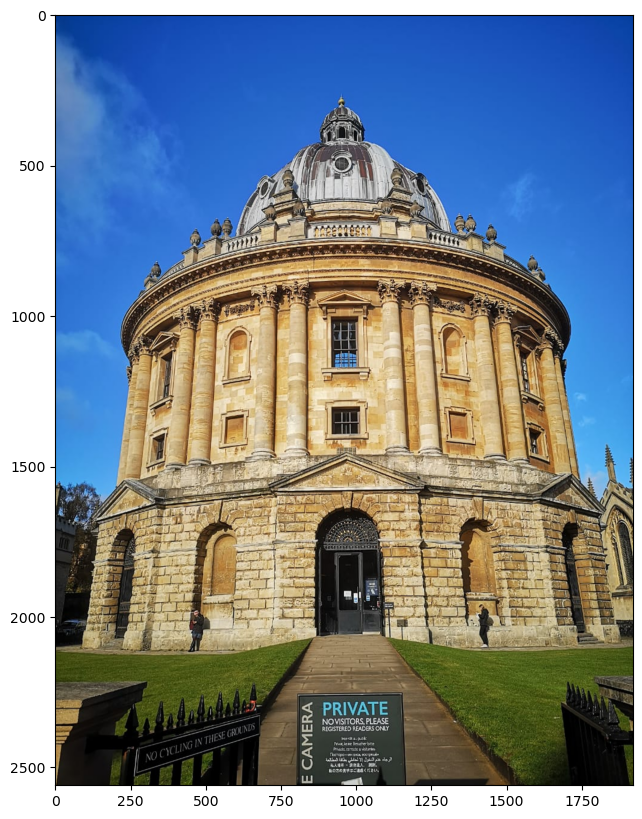

(2560, 1920, 3)


In [6]:
# Vamos dobrar o tamanho da nossa imagem.
img_scaled2 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
imshow(img_scaled2)

print(img_scaled2.shape)



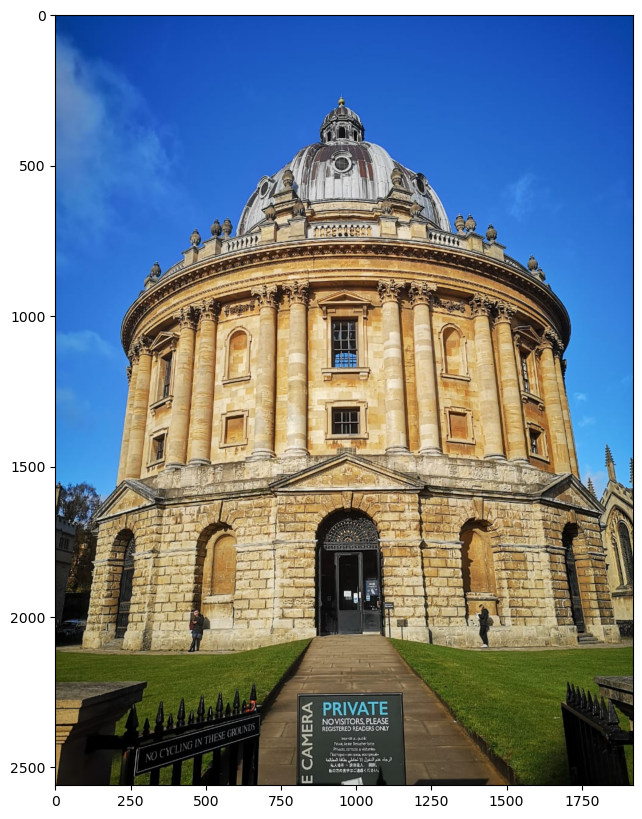

In [8]:

# Vamos dobrar o tamanho da nossa imagem usando a interpolação inter_nearest.
img_scaled3 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
imshow(img_scaled3)



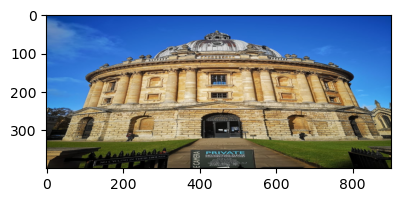

In [9]:
# Vamos distorcer o redimensionamento definindo dimensões exatas.
img_scaled4 = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
imshow(img_scaled4)

# **Recorte**

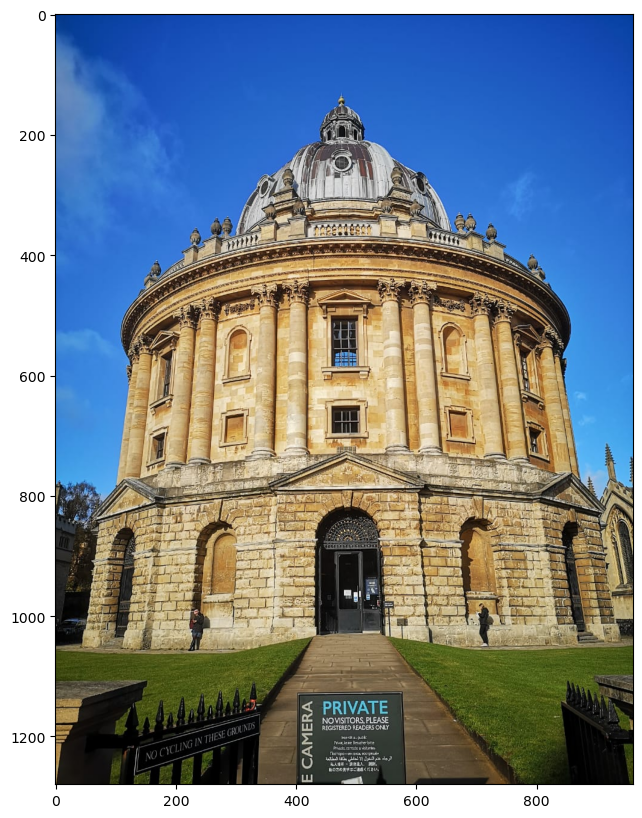

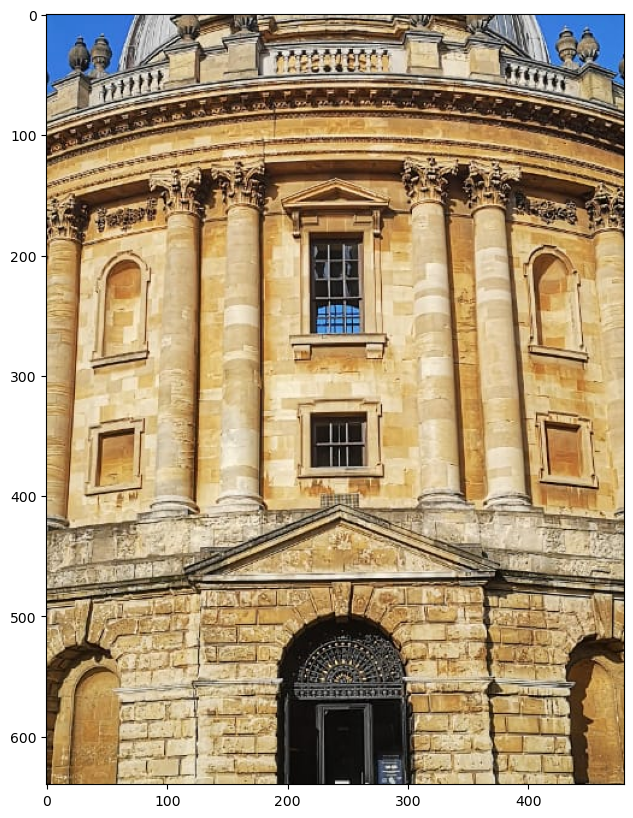

In [11]:
image = cv2.imread('images/oxfordlibrary.jpeg')

height, width = image.shape[:2]

# Vamos obter as coordenadas do pixel de partida (canto superior esquerdo
# do retângulo de recorte), usando 0.25 para obter a posição x, y que está
# 1/4 abaixo do canto superior esquerdo (0,0).
start_row, start_col = int(height * .25), int(width * .25)

# Vamos obter as coordenadas do pixel final (canto inferior direito).
end_row, end_col = int(height * .75), int(width * .75)

# Basta usar o fatiamento para recortar o retângulo desejado.
cropped = image[start_row:end_row , start_col:end_col]

imshow(image)

copy = image.copy()
cv2.rectangle(copy, (start_col,start_row), (end_col,end_row), (0,255,255), 10)

imshow(cropped) 